In [248]:
%%HTML

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import warnings

plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style="whitegrid")

In [250]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Predicting the Mortality Rate Due to Opioid Addiction At the County Level

## What is the opioid epidemic?

Wikipedia defines the opioid epidemic as the following:

> The opioid epidemic or opioid crisis is the rapid increase in the use of prescription and non-prescription opioid drugs  in the United States and Canada beginning in the late 1990s and continuing throughout the next two decades. Opioids are a diverse class of moderately strong painkillers, including oxycodone (commonly sold under the trade names OxyContin and Percocet), hydrocodone (Vicodin), and a very strong painkiller, fentanyl, which is synthesized to resemble other opiates such as opium-derived morphine and heroin.

*Source: https://en.wikipedia.org/wiki/Opioid_epidemic *

### From 1999 to 2016 in America, the increase in deaths due to opioid overdose increased by 425%, from 8,050 deaths in 1999 to 42,249 deaths in 2016. That's over four times the increase in 17 years.

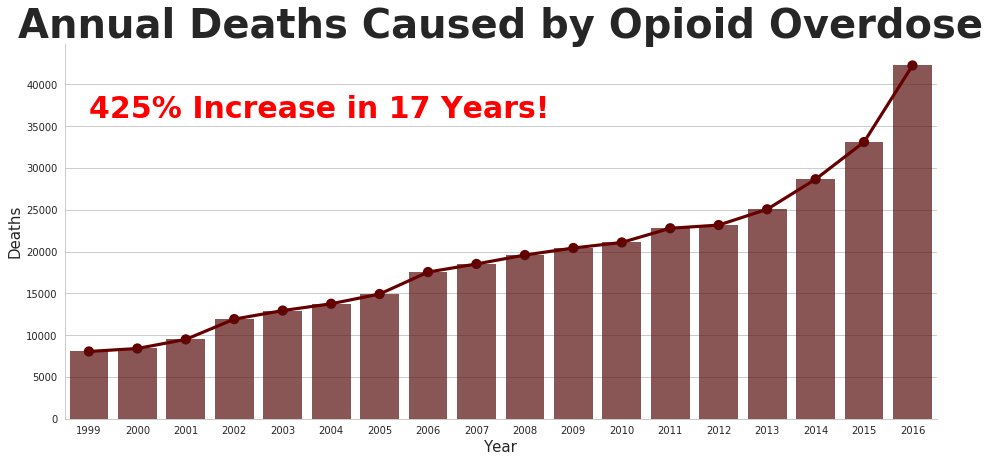

In [251]:
# read in opioid death data with age, sex, and ethnicity information
opioid_deaths = pd.read_csv('opioid_deaths.csv')

# calculate sum of deaths by year
totals = opioid_deaths.groupby('Year').Deaths.sum().reset_index()

# bar plot with line plot overlaid
g = sns.FacetGrid(totals, size = 6, aspect = 2.2)
g = g.map(sns.barplot, 'Year', 'Deaths', color = '#660000', alpha = 0.7)
g = g.map(sns.pointplot, 'Year', 'Deaths', color = '#660000')
# g.set_axis_labels("Year","Deaths")
plt.title('Annual Deaths Caused by Opioid Overdose', fontsize = 40, fontweight = 'bold')
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Deaths", fontsize = 15)
plt.text(x = 0, y = 36000, s = "425% Increase in 17 Years!", fontsize = 30, color = 'red', fontweight = 'bold')
plt.show()

## Reading Between the Numbers - Why We Should Care

Many are dying because of opioid overdose. But it's not just death. Many people that are not represented in these death numbers are struggling with opioid addiction. Not only does opioid addiction destroy the health of the addicted individual, but it also negatively impacts the lives of the addicted person's loved ones, his or her families, and, ultimately, the communities at large. Dangers of opioid addiction to communities have been recognized by other nations as well. For example, in the 1950s, because of the destroyed lives and communities by opioid addiction, China not only banned opium, but it also executed those who were caught selling opium. 

Addiction to opioids, like any other addictions, leads to financial problems, health problems, lack of self control, relational difficulties, and ultimately destroys every aspect of the person, and the end result is death. Watch the video (https://youtu.be/VpEQaa6jzUU) of the story of Amy and her struggle with opioid addiction to see a glimpse of the struggles that come with opioid addiction.

[![Alt text](https://img.youtube.com/vi/VpEQaa6jzUU/0.jpg)](https://www.youtube.com/watch?v=VpEQaa6jzUU)


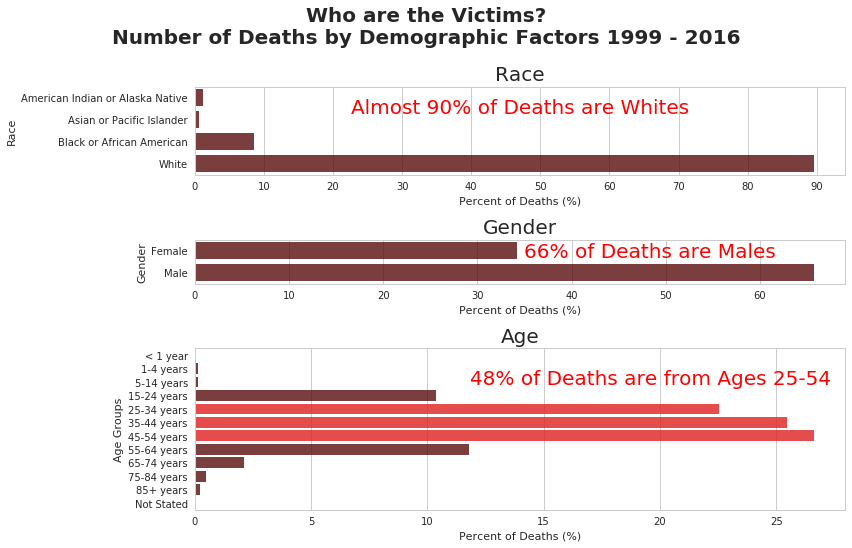

In [252]:
# create subplot with three columns and one row
f, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={"height_ratios": (.3, .15, .55)})
f.suptitle('Who are the Victims?\nNumber of Deaths by Demographic Factors 1999 - 2016', fontsize = 20, fontweight = 'bold')

# first subplot:
# calculate percent of deaths by race
total = opioid_deaths.Deaths.sum()
race = opioid_deaths.groupby('Race').Deaths.apply(lambda x: round(sum(x) / total * 100, 2)).reset_index()
race.columns = ['Race', 'Percent of Deaths (%)']
# plot bar plot
sns.barplot(x = 'Percent of Deaths (%)', y = 'Race', data = race, ax=ax1, color = '#660000', alpha = 0.8)
ax1.xaxis.set_major_locator(plt.MaxNLocator(11))
ax1.set_title('Race', fontsize = 20)
ax1.text(0.5, 0.65, 'Almost 90% of Deaths are Whites',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax1.transAxes,
        color='red', fontsize=20)

# second subplot:
# calculate percent of deaths by gender
gender = opioid_deaths.groupby('Gender').Deaths.apply(lambda x: round(sum(x) / total * 100, 2)).reset_index()
gender.columns = ['Gender', 'Percent of Deaths (%)']
# plot bar plot
sns.barplot(x = 'Percent of Deaths (%)', y = 'Gender', data = gender, ax=ax2, color = '#660000', alpha = 0.8)
ax2.set_title('Gender', fontsize = 20)
ax2.text(0.7, 0.5, '66% of Deaths are Males',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax2.transAxes,
        color='red', fontsize=20)

# third subplot:
# calculate percent of deaths by age group
age = opioid_deaths.groupby('ten_year_groups_relabel').Deaths.apply(lambda x: round(sum(x) / total * 100, 2)).reset_index()
age.columns = ['Age Groups', 'Percent of Deaths (%)']
# set colors for bar plot
clrs = ['#660000' if (x < 15) else 'red' for x in age.iloc[:, 1]]
# plot bar plot
sns.barplot(x = 'Percent of Deaths (%)', y = 'Age Groups', data = age, ax = ax3, palette = clrs, alpha = 0.8)
ax3.set_yticklabels(opioid_deaths['Ten-Year Age Groups'].unique().tolist())
ax3.set_title('Age', fontsize = 20)
ax3.text(0.7, 0.75, '48% of Deaths are from Ages 25-54',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax3.transAxes,
        color='red', fontsize=20)

plt.tight_layout(rect = [0, 0.03, 1, 0.9])
plt.show()

## Top Ten Counties with Highest Mortality Rate Caused by Opioid Overdose in 2016

In [253]:
# read in username and api_key for plotly
with open('userid.txt') as file:
    userid = file.readline()
with open('api_key.txt') as file:
    api_key = file.readline()

In [254]:
# log in to plotly tools
plotly.tools.set_credentials_file(username = userid[:-1], api_key= api_key[:-1])

# read in data
merged_data = pd.read_csv('merged_data.csv')

# pad fips_padded_zeros columns with zeros in front
merged_data['fips_padded_zeros'] = merged_data.fips_code.apply(lambda x: str(x).zfill(5))

# colors to use for plotly plot
colorscale = ["#FFFFFF","#F6F1F1","#EEE4E4","#E6D6D6","#DEC9C9","#D6BBBB","#CEAEAE",
              "#C6A1A1","#BE9393","#B68686","#AE7878","#A66B6B","#9E5D5D","#965050",
              "#8E4343","#863535","#7E2828", "#761A1A", "#6E0D0D", "#660000"]

# color gradient endpts
endpts = list(np.linspace(1, 90, len(colorscale) - 1))

fips_padded_zeros = merged_data['fips_padded_zeros'].tolist()
values = merged_data['crude_opioid_mortality_rate'].tolist()

# plotly plot
fig = ff.create_choropleth(
    fips=fips_padded_zeros, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Opioid Overdose Mortality Rate, 2016',
    legend_title='Mortality Rate (per 100,000)', scope = ['usa']
)
py.iplot(fig, filename='choropleth_full_usa')

*Note: Counties with missing values, unreliable values, or zero to nine deaths caused by opioid overdose are not portrayed in map.*

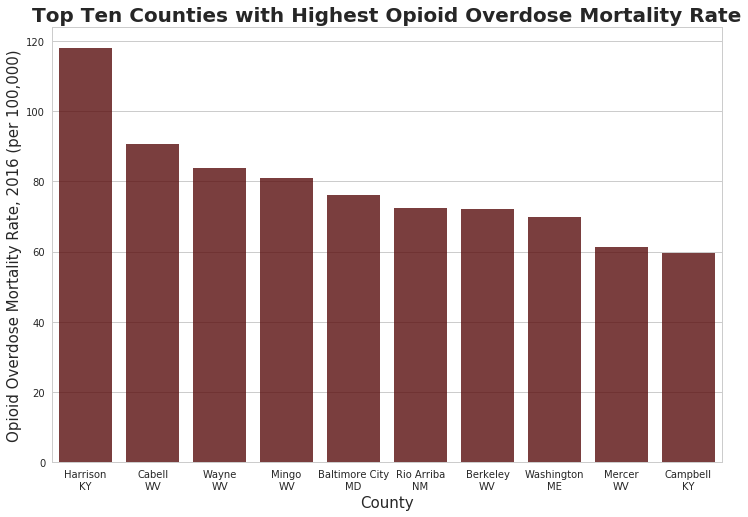

In [255]:
# combine county and state as one column
merged_data['county_state'] = merged_data.county.map(str) + "\n"  + merged_data.state
# obtain the location of columns I want to select - ['county', 'state', 'population', 'deaths', 'crude_opioid_mortality_rate']
wanted_columns = [merged_data.columns.get_loc(column_label) for column_label in ['county_state', 'crude_opioid_mortality_rate']]
# ten counties with highest crude_opioid_mortality_rate
top_ten = merged_data.sort_values('crude_opioid_mortality_rate', ascending = False).iloc[:10, wanted_columns]

sns.barplot(x = 'county_state', y = 'crude_opioid_mortality_rate', data = top_ten, color = '#660000', alpha = 0.8)
plt.title('Top Ten Counties with Highest Opioid Overdose Mortality Rate', fontsize = 20, fontweight = 'bold')
plt.xlabel("County", fontsize = 15)
plt.ylabel("Opioid Overdose Mortality Rate, 2016 (per 100,000)", fontsize = 15)
plt.show()

Based on the map and the bar plot, we see that **Harrison, KY** is the county that had the highest mortality rate per 100,000 people caused by opioid overdose with **118 deaths per 100,000 people due to opioid overdose**. That is **0.118% of all the people in Harrison County dying because of opioid overdose**. In terms of state, we see that **West Virginia** has five counties in the top ten highest mortality rate per 100,000 people caused by opioid overdose.

## What is the problem I want to solve?

The problem I want to solve is predicting the United States' county's mortality rate per 100,000 people caused by opioid overdose for 2016 given a county’s median household income, population estimate, unemployment rate, poverty rate estimate, educational attainment, and opioid prescription rate by health care providers.

## Datasets

I gathered data from the following sources and combined them into one dataframe.

* US County Opioid Prescribing Rates 2016
    * https://www.cdc.gov/drugoverdose/maps/rxcounty2016.html
* Unemployment, median household income, educational attainment, poverty rate estimates,and population estimates:
    * https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/
* Underlying Cause of Death
    * https://raw.githubusercontent.com/danielhanbitlee/Springboard/master/capstone_project/drug_overdose_death_opioid_2016.txt
    * https://wonder.cdc.gov/controller/saved/D77/D39F042
        * Note that statistics representing zero to nine deaths are suppressed at the region, state and county level.

## Variables

The following are the variables included in the main dataset that is used for analysis. In bold are the variable names. Some of the variables have descriptions of what the variables represent.

1. **%_high_school_diploma_only_2012-2016**  
* **%_povall_2016** - Estimated percent of people of all ages in poverty 2016    
* **county** - County's name  
* **county_state** - County's name and state the county is located in  
* **crude_opioid_mortality_rate** - Estimated rate for deaths caused by opioid overdose in the county for 2016 per 100,000 people
    * Specifically, the types of drug-related deaths include the following:
        * Drug poisonings (overdose)
        * Unintentional
        * Suicide
        * Homicide
        * Undetermined
    * The specific drugs included in the death rates are the following:
        * Opium
        * Heroin
        * Other opioids
        * Methadone
        * Other synthetic narcotics
        * Other and unspecified narcotics    
          
            
6. **fips_code** - County's unique code    
* **fips_padded_zeros** - County's unique code padded with zeros in front  
* **gq_estimates_2016** - 7/1/2016 Group Quarters total population estimate 
    *  all people not living in housing units (house, apartment, mobile home, rented rooms)
    * e.g. people living in correctional facilities  
  
* **median_household_income_2016** - Estimate of median household Income, 2016    
* **opioid_prescription_rate** - Prescription rate for opioids for the county    
* **pop_chg_2016** - Net change in resident total population 7/1/2015 to 7/1/2016    
* **pop_estimate_2016** - Estimated population for the county in 2016    
* **rate_birth_2016** - Birth rate in period 7/1/2015 to 6/30/2016    
* **rate_death_2016** - Overall death rate (all causes, not only caused by opioid overdose) in period 7/1/2015 to 6/30/2016    
* **rate_domestic_mig_2016** - Net domestic migration rate in period 7/1/2015 to 6/30/2016    
* **rate_international_mig_2016** - Net international migration rate in period 7/1/2015 to 6/30/2016   
* **state** - State the county is in    
* **unemployment_rate_2016** - Unemployment rate, 2016  

## Exploratory Data Analysis

### Distribution of County's Crude Mortality Rate Caused By Opioid Overdose 2016

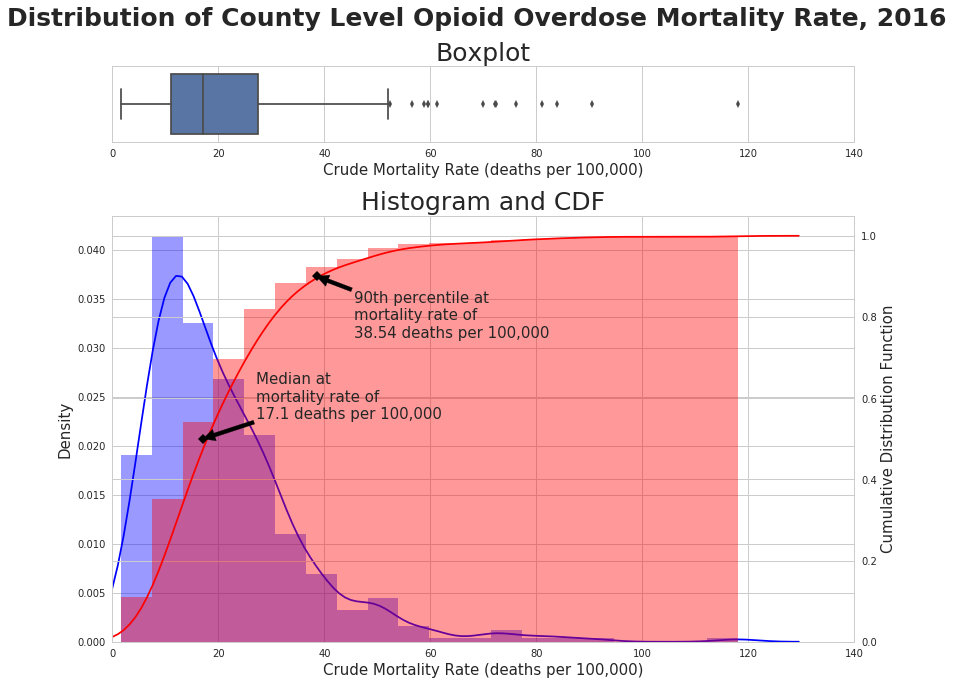

In [256]:
# resize figures
plt.rcParams['figure.figsize'] = [12, 10]

# Calculate number of bins to use for histogram
# Number of bins is the square root of number of data points: n_bins
n_data = len(merged_data['crude_opioid_mortality_rate'])
n_bins = np.sqrt(n_data)
# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Cut the figure in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot to first subplot
sns.boxplot(merged_data['crude_opioid_mortality_rate'], ax=ax_box)
# Set x-axis name for the boxplot
ax_box.set_xlabel('Crude Mortality Rate (deaths per 100,000)', fontsize = 15)
# Set x-axis range
ax_box.set_xlim((0, 140))
# Set number of tickmarks for x-axis
ax_box.xaxis.set_major_locator(plt.MaxNLocator(9))
# Set title for boxplot
ax_box.set_title("Boxplot", fontsize = 25)

# Add histogram to second subplot
sns.distplot(merged_data['crude_opioid_mortality_rate'], color = 'blue', bins = n_bins, ax=ax_hist)

# Have an overlaying plot for second subplot
ax_hist2 =ax_hist.twinx()

# Overlay ecdf to histogram
sns.distplot(merged_data['crude_opioid_mortality_rate'], 
             color = 'red', 
             bins= n_bins, 
             kde_kws = dict(cumulative = True), 
             hist_kws=dict(cumulative=True), 
             ax=ax_hist2)

# Calculate median for cdf
median = np.percentile(merged_data['crude_opioid_mortality_rate'], 50)
# Plot point at median
_ = plt.plot(median, .5, marker='D', color='black',
         linestyle='none')
# Add arrow at median with text
ax_hist2.annotate('Median at\nmortality rate of\n{} deaths per 100,000'.format(median), 
                  xy=(median, .5), 
                  xytext=(median + 10, 0.55),
                  arrowprops=dict(facecolor='black'),
                  fontsize = 15)

# Calculate 90th percentile for cdf
percentile_90th = np.percentile(merged_data['crude_opioid_mortality_rate'], 90)
# Plot point at 90th percentile
_ = plt.plot(percentile_90th, .9, marker='D', color='black',
         linestyle='none')
# Add arrow at 90th percentile with text
ax_hist2.annotate('90th percentile at\nmortality rate of\n{} deaths per 100,000'.format(round(percentile_90th, 2)), 
                  xy=(percentile_90th, .9), 
                  xytext=(percentile_90th + 7, 0.75),
                  arrowprops=dict(facecolor='black'),
                  fontsize = 15)

# Set x-axis limit for histogram
ax_hist.set_xlim((0, 140))

# Add axis labels for histogram and cdf
ax_hist.set_title("Histogram and CDF", fontsize = 25)
ax_hist.set_ylabel('Density', fontsize = 15)
ax_hist.set_xlabel('Crude Mortality Rate (deaths per 100,000)', fontsize = 15)
ax_hist2.set_ylabel('Cumulative Distribution Function', fontsize = 15)

# Add title to figure
f.suptitle('Distribution of County Level Opioid Overdose Mortality Rate, 2016', fontsize = 25, fontweight = 'bold')

# Adjust plot layout
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

We see that the county-level opioid overdose mortality rate has a long right tail. Based on the distribution of the crude mortality rate, we see that 90 percent of the counties have mortality rates in the range of 0 to 38.54 deaths per 100,000 people (0.04%).

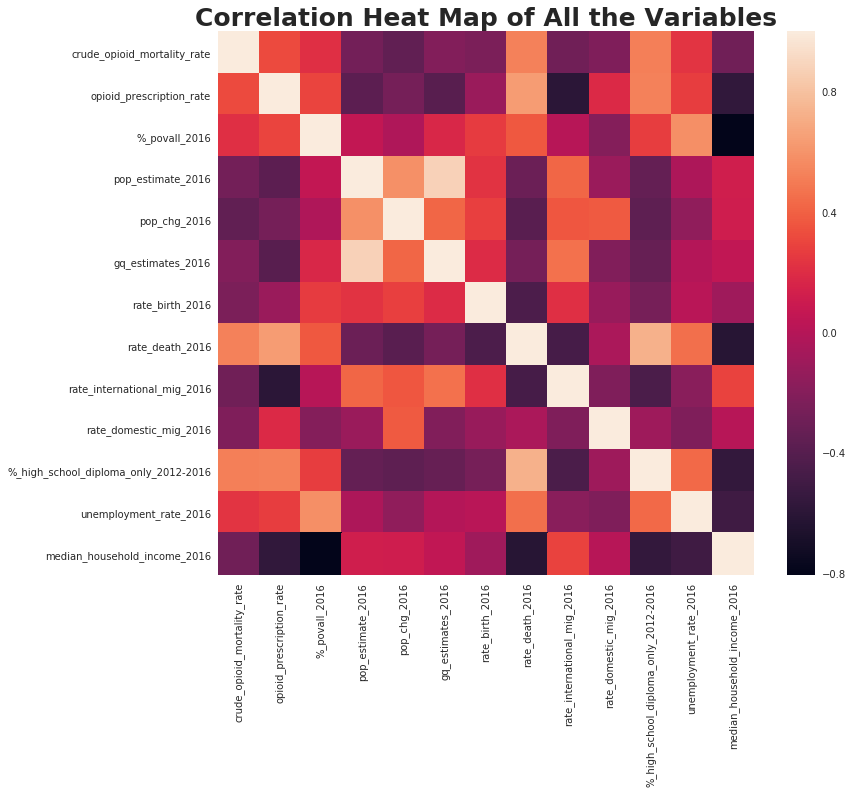

In [257]:
# remove fips_code, county, and state columns to prepare data for creating correlation matrix
merged_remove = merged_data.drop(labels = ['fips_code', 'county', 'state'], axis = 1)

# correlation heatmap
sns.heatmap(merged_remove.corr())
plt.title('Correlation Heat Map of All the Variables', fontsize = 25, fontweight = 'bold')
plt.show()

Next, let's focus on correlation between crude mortality rate and all other variables.

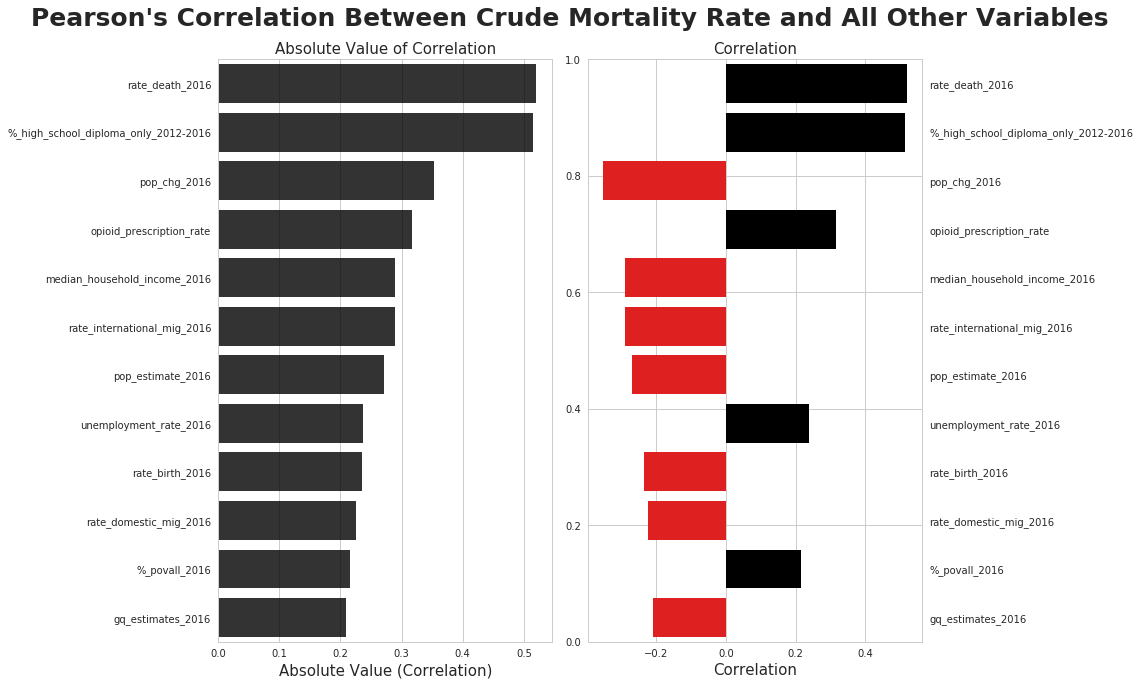

In [258]:
# resize figures
plt.rcParams['figure.figsize'] = [16, 10]

# calculate pairwise Pearson's correlation for all the variables
merged_corr = merged_remove.corr()

# drop crude_opioid_mortality_rate row from merged_corr and select only the column for crude_opioid_mortality_rate
crude_opioid_mortality_rate_corr = merged_corr.drop('crude_opioid_mortality_rate', axis = 0)\
                                   .crude_opioid_mortality_rate

# sorted correlations between crude_opioid_mortality_rate and all other variables
crude_corr_df = pd.DataFrame({
                              'p_corr' : crude_opioid_mortality_rate_corr,
                              'abs_corr': abs(crude_opioid_mortality_rate_corr),
                              'crude_opioid_mortality_rate_corr': crude_opioid_mortality_rate_corr 
                              }).sort_values('abs_corr', ascending = False).reset_index()
crude_corr_df.columns = ['variable', 'p_corr', 'abs_corr', 'crude_opioid_mortality_rate_corr']

# barplot of correlation values when calculating correlation with crude mortality rate

# Cut the figure in 2 parts
f, (ax_abs_corr, ax_corr) = plt.subplots(nrows = 1, ncols = 2)

# First subplot
# Create barplot of absolute value correlation values
sns.barplot(x = 'abs_corr', y = 'variable', data = crude_corr_df, color = 'black', ax = ax_abs_corr, alpha = 0.8)
# Set labels
ax_abs_corr.set_title('Absolute Value of Correlation', fontsize = 15)
ax_abs_corr.set_xlabel('Absolute Value (Correlation)', fontsize = 15)
ax_abs_corr.set_ylabel("")

# Second subplot
# Set labels
ax_corr.set_xlabel('Correlation', fontsize = 15)
ax_corr.set_ylabel('')
# Create another plot overlaying the second subplot
ax_corr2 =ax_corr.twinx()
# Assign colors red for negative correlation values, black for positive
clrs = ['red' if (x < 0) else 'black' for x in crude_corr_df.p_corr]
# Create bar plot of correlation values
sns.barplot(x = 'p_corr', y = 'variable', data = crude_corr_df, palette = clrs, ax = ax_corr2)
# Add labels
ax_corr2.set_title('Correlation', fontsize = 15)
ax_corr2.set_ylabel("")

# Add main title for plot
plt.suptitle('Pearson\'s Correlation Between Crude Mortality Rate and All Other Variables', fontsize = 25, fontweight = 'bold')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

From above bar plot and dataframe, we can see that the top three variables most correlated with crude mortality rate are the death rate in the county per 1,000 people, percent of adults with a high school diploma only, and population change in 2016 for the county. Population change is negatively correlated with mortality rate due to opioid overdose.

### Scatter Plots

Let's see the scatter plots between crude mortality rate and the top nine variables that have high Pearson's correlation value.

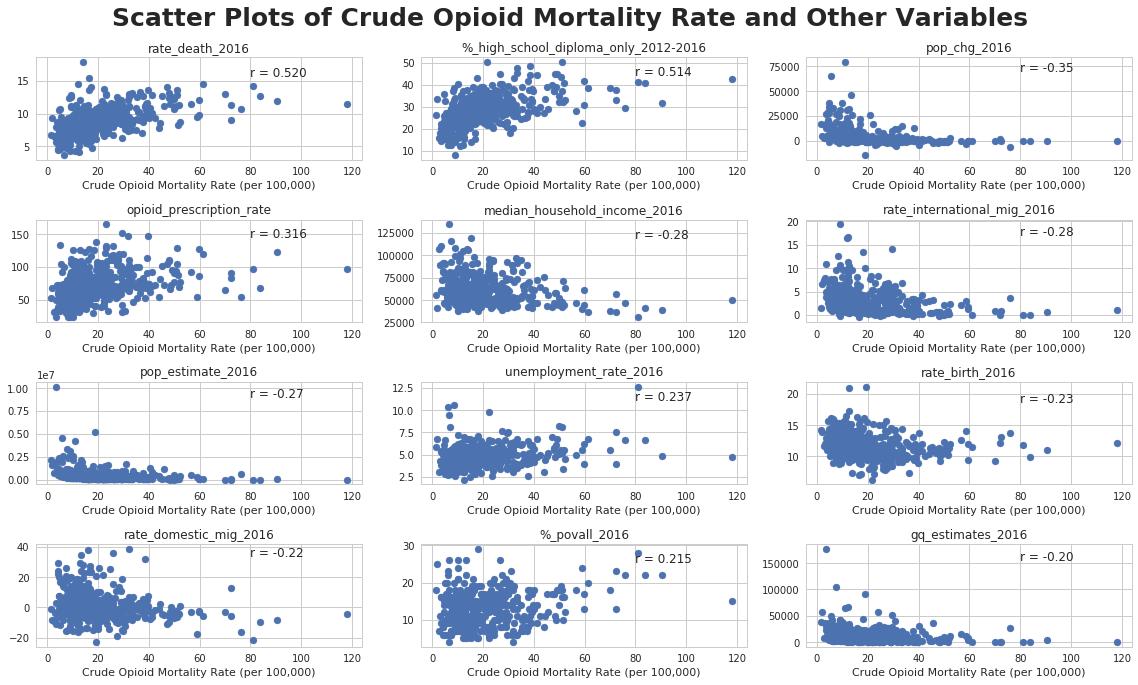

In [259]:
for i in range(12):
    plt.subplot(4, 3, i + 1)
    plt.scatter(x = 'crude_opioid_mortality_rate', y = crude_corr_df.variable[i], data = merged_data)
    plt.xlabel('Crude Opioid Mortality Rate (per 100,000)')
    plt.title('{}'.format(crude_corr_df.variable[i]), fontsize = 12)
    values = merged_data.loc[:, '{}'.format(crude_corr_df.variable[i])]
    plt.text(80, 0.88 * max(values), 
             "r = " + str(crude_corr_df.crude_opioid_mortality_rate_corr[i])[:5])
plt.suptitle("Scatter Plots of Crude Opioid Mortality Rate and Other Variables", fontsize = 25, fontweight = 'bold')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

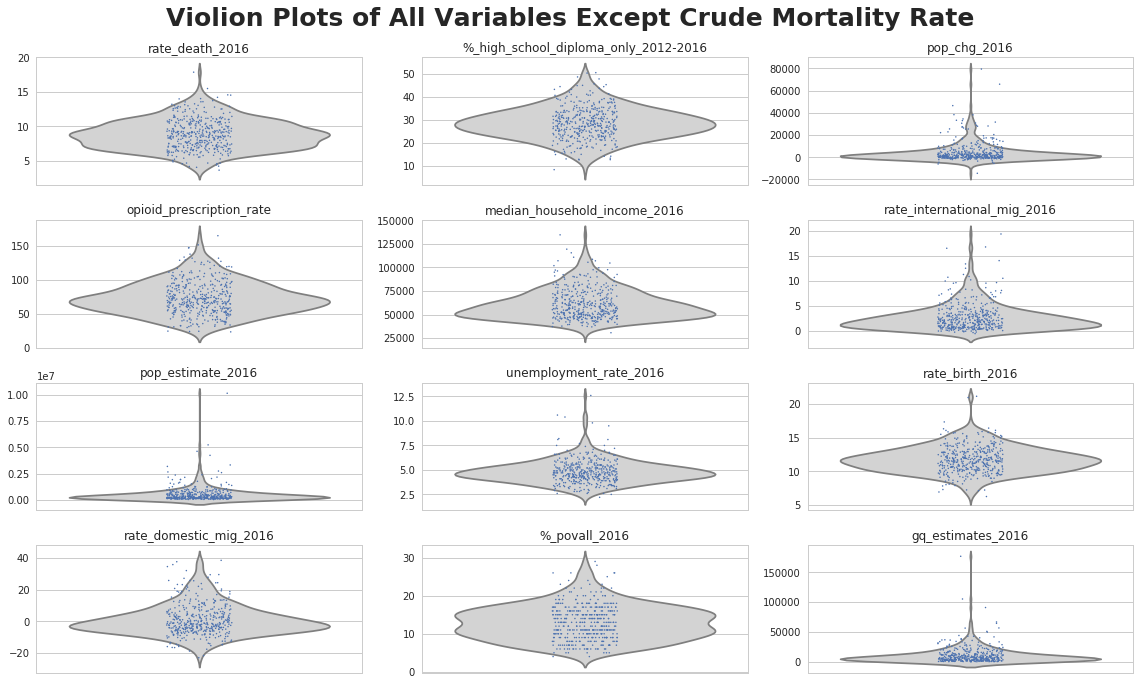

In [260]:
for i in range(12):
    plt.subplot(4, 3, i + 1)
    sns.violinplot(y = crude_corr_df.variable[i], data = merged_data, inner = None, color = 'lightgray')
    sns.stripplot(y = crude_corr_df.variable[i], data = merged_data, size = 1.5, jitter = True)
    plt.ylabel('')
    plt.title('{}'.format(crude_corr_df.variable[i]))
plt.suptitle('Violion Plots of All Variables Except Crude Mortality Rate', fontsize = 25, fontweight = 'bold')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

From these violin plots, I see that most of the variables have distributions that are right skewed (long right tail).

## Conclusion From Exploratory Data Analysis

It seems as if the the counties with higher mortality rates caused by opioid addiction have the following:
* Higher overall mortality rate
* Have more adults with high school diplomas only
* Higher opioid prescription rates
* Decrease in population size in 2016
* Lower median household income  

The reason why counties with higher mortality rate caused by opioid overdose tend to come from counties with higher overall mortality rate should be investigated further. One reason that these counties have such high mortality rates could be that the population in these counties are older. Another reason could be that these counties may not have good access to healthcare for the residents. This can be something on which we can do more research.

Further research could also be done to investigate as to why counties that have high percentage of the population with only high school diplomas have high opioid overdose mortality rate. This can be because the population in these counties are older. Or, people in these counties may not have access to higher education for some reason.